**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
- 3. [Quesitions](#toc3_)   

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [11]:
# import various libraries etc.
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
import scipy.stats
from ExchangeEconomy import *
model = ExchangeEconomyClass()
par = model.par
from ExchangeEconomy import ExchangeEconomyClass

# update default layout-settings
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [12]:
# define default parameters
alpha = model.par.alpha
beta = model.par.beta

## 3. <a id='toc3_'></a>[Questions](#toc0_)

# Question 1

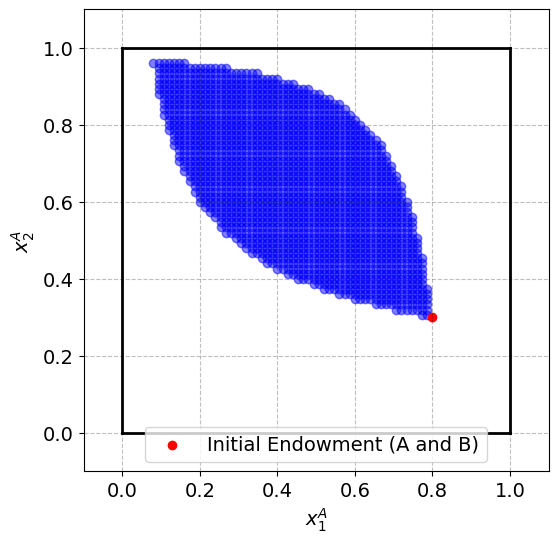

In [13]:
# a. set total endowments
w1bar = 1.0
w2bar = 1.0


# Set initial endowments
w_A1, w_A2 = 0.8, 0.3  # Initial endowment for Agent A
w_B1, w_B2 = 1-w_A1, 1-w_A2  # Initial endowment for Agent B



# Calculate utility at initial endowments
u_A_initial = model.utility_A(w_A1, w_A2)
u_B_initial = model.utility_B(w_B1, w_B2)

# b. figure set up for Edgeworth Box
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

ax_A.set_xlim([0, 1])
ax_A.set_ylim([0, 1])

N = 75
x_A1_range = np.linspace(0, 1, N+1)
x_A2_range = np.linspace(0, 1, N+1)

# define a variable that stores the points in the set
points_in_set = []

# Plot feasible allocations satisfying utility conditions
for x_A1 in x_A1_range:
    for x_A2 in x_A2_range:
        x_B1 = 1 - x_A1
        x_B2 = 1 - x_A2
        
        # Check if both agents' utility conditions are met
        if model.utility_A(x_A1, x_A2) >= u_A_initial and model.utility_B(x_B1, x_B2) >= u_B_initial:
            points_in_set.append((x_A1,x_A2))
            ax_A.scatter(x_A1, x_A2, color='blue', alpha=0.5)

# Highlight initial endowments
            
# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    


ax_A.scatter(w_A1, w_A2, color='red', label='Initial Endowment (A and B)')
ax_A.legend()

plt.grid(True)
plt.show()

It is seen that with the initial endowment the corresponding allocation is shown with the red dot. The set C is shown by the blue area.

# Question 2

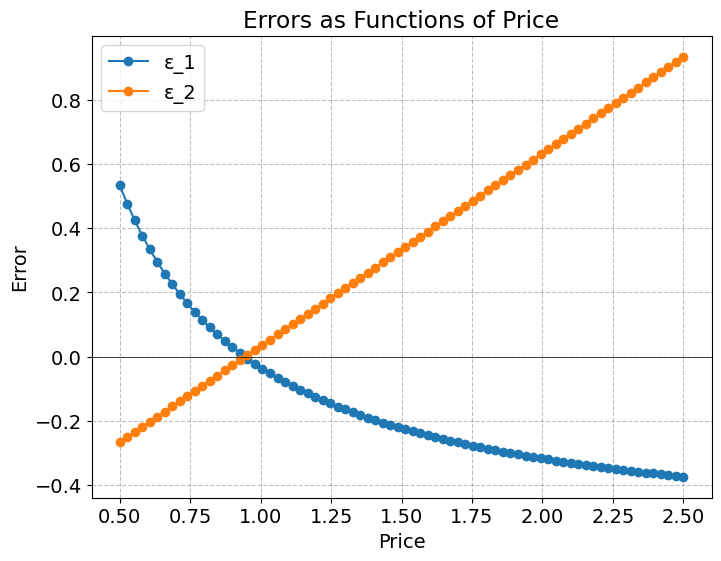

In [14]:
# Price vector
N = 75
p1_values = np.array([0.5 + 2*i/N for i in range(N+1)]).reshape(1, -1)

# Calculating error in the market clearing
epsilon1 = []
epsilon2 = []
p_1 = []

for p1 in p1_values.flatten():
    demand_A1, demand_A2 = model.demand_A(p1)     
    demand_B1, demand_B2 = model.demand_B(p1)     
    
    epsilon1.append(demand_A1 - w_A1 + demand_B1 - w_B1)
    epsilon2.append(demand_A2 - w_A2 + demand_B2 - w_B2)
    p_1.append(p1)

# Results
plt.figure(figsize=(8, 6))
plt.plot(p_1, epsilon1, label='ε_1', marker='o')
plt.plot(p_1, epsilon2, label='ε_2', marker='o')
plt.xlabel('Price')
plt.ylabel('Error')
plt.title('Errors as Functions of Price')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

The errors show the difference between the total demand and the total endowment for each of the goods, and are plotted as a function of the price. If the curves for epsilon_1 and epsilon_2 are above the line y=0, it means there is excess demand, and if the curves are below the the y=0, it means there is excess supply. The point where the two curves meet at y=0 is the price where the market clears.

# Question 3

In [15]:
# We find the equilibrium price using the find_equilibrium_price_model
p1_eq = model.find_equilibrium_price()
print(f"Equilibrium price p1: {p1_eq: .2f}")


x_A1_star_MC, x_A2_star_MC = np.clip(model.demand_A(p1_eq), 0, 1)
x_B1_star_MC, x_B2_star_MC = np.clip(model.demand_B(p1_eq), 0, 1)


# Market clearing allocation
optimal_allocation_A_MC = (x_A1_star_MC, x_A2_star_MC)
optimal_allocation_B_MC = (x_B1_star_MC, x_B2_star_MC)

# print the results
print(f"Optimal A:, {optimal_allocation_A_MC[0]:.2}, {optimal_allocation_A_MC[1]:.2}")
print(f"Optimal B:, {optimal_allocation_B_MC[0]:.2}, {optimal_allocation_B_MC[1]:.2}")

Equilibrium price p1:  0.94
Optimal A:, 0.37, 0.7
Optimal B:, 0.63, 0.3


Conclusion: Market clearing price is p1 = 0.94. This implies person A consumes 0.37 of good 1 and 0.7 of good 2. Conversely, person B consumes 0.63 good 1 and 0.3 good 2. A consumes more since their endownment is greater.

The market clearing price found by the solver looks to be the same as the error function indicated in question 2.

# Question 4.a

In [53]:
# pick a starting point
optimal_utility = -float('inf')
optimal_p1 = None
optimal_allocation_A = (None, None)
optimal_allocation_B = (None, None)

# consumer A chooses a price and consumer B then purchases at this price. THen, consumer A can buy what's left over.
for p1 in p1_values.flatten():
    # Calculate demand for B given this price
    xB1_star, xB2_star = model.demand_B(p1)
    
    # Calculate leftovers for Agent A after B buys what he wants at price p1
    leftover_A1 = w_A1 + w_B1 - xB1_star
    leftover_A2 = w_A2 + w_B2 - xB2_star

    # Adjust Agent A's consumption based on the leftover and their willingness to buy at this price
    xA1_star = max(0, leftover_A1)
    xA2_star = max(0, leftover_A2)
    
    # Checking if allocations are geq 0 and leq 1
    if 0 <= xA1_star <= 1 and 0 <= xA2_star <= 1 and 0 <= xB1_star <= 1 and 0 <= xB2_star <= 1:
        # Utility for A
        utility = model.utility_A(xA1_star, xA2_star)
        
        # Checking if this utility is better than best so far found
        if utility > optimal_utility:
            optimal_utility = utility
            optimal_p1 = p1
            optimal_allocation_A_4a = (xA1_star, xA2_star)
            optimal_allocation_B_4a = (xB1_star, xB2_star)

# Print results with 2 decimal places
print("Optimal Price for Consumer A: {:.2f}".format(optimal_p1))
print("Optimal Utility of Consumer A: {:.2f}".format(optimal_utility))
print("Optimal Allocation for A: ({:.2f}, {:.2f})".format(optimal_allocation_A_4a[0], optimal_allocation_A_4a[1]))
print("Optimal Allocation for B: ({:.2f}, {:.2f})".format(optimal_allocation_B_4a[0], optimal_allocation_B_4a[1]))



Optimal Price for Consumer A: 1.90
Optimal Utility of Consumer A: 0.63
Optimal Allocation for A: (0.62, 0.64)
Optimal Allocation for B: (0.38, 0.36)


# Question 4.b

We seek to do exactly the same optimization as before. However, as a change, we no longer limit ourselves to a specific range, but rather optimize over "all" numbers. 
Hence, we would expect the same result, but with slightly varying decimals.

In [81]:
# Define the function which we want to maximize (utility for consumer A)
def objective(p1):
    xB1_star, xB2_star = model.demand_B(p1)
    xA1_star = max(0, w_A1 + w_B1 - xB1_star)
    xA2_star = max(0, w_A2 + w_B2 - xB2_star)
    return -model.utility_A(xA1_star, xA2_star)

# Define the constraints for which peron A is facing. First that person B consumes according to their demand function
def constraint1(p1):
    xB1_star, xB2_star = model.demand_B(p1)
    return [xB1_star, xB2_star]  
# then that consumer a consumes what's left over (given it is positive)
def constraint2(p1):
    xB1_star, xB2_star = model.demand_B(p1)
    xA1_star = max(0, w_A1 + w_B1 - xB1_star)
    xA2_star = max(0, w_A2 + w_B2 - xB2_star)
    return [xA1_star, xA2_star]  

# Set up the constraints such that they align with the minimize function
constraints = [
    {'type': 'ineq', 'fun': lambda p1: constraint1(p1)[0]},  # xB1_star >= 0
    {'type': 'ineq', 'fun': lambda p1: constraint1(p1)[1]},  # xB2_star >= 0
    {'type': 'ineq', 'fun': lambda p1: constraint2(p1)[0]},  # xA1_star >= 0
    {'type': 'ineq', 'fun': lambda p1: constraint2(p1)[1]}   # xA2_star >= 0
]

# Initial guess for p1
p1_initial = 1.0

# Perform the optimization
result = minimize(objective, p1_initial, method='SLSQP', constraints=constraints)

# Output the result
if result.success:
    optimal_p1 = result.x[0]
    # Calculate the optimal allocations
    xB1_star, xB2_star = model.demand_B(optimal_p1)
    xA1_star = max(0, w_A1 + w_B1 - xB1_star)
    xA2_star = max(0, w_A2 + w_B2 - xB2_star)
    
    print(f'Optimal p1: {optimal_p1:.2f}')
    print(f'Optimal allocations for person A: xA1_star = {xA1_star:.2f}, xA2_star = {xA2_star:.2f}')
    print(f'Optimal allocations for person B: xB1_star = {xB1_star:.2f}, xB2_star = {xB2_star:.2f}')
else:
    print('Optimization failed:', result.message)

optimal_allocation_A_4b = (xA1_star, xA2_star)
optimal_allocation_B_4b = (xB1_star, xB2_star)


Optimal p1: 1.90
Optimal allocations for person A: xA1_star = 0.62, xA2_star = 0.64
Optimal allocations for person B: xB1_star = 0.38, xB2_star = 0.36


Conclusion: We get the same results (when rounded to two decimals). This is in line with what we expected. However, notice that the difference in results likely would be bigger if we made the optimization in question 4.a with a less-filled list (that is, with fewever numbers)

# Question 5.a

In [91]:
# Initialize variables
optimal_utility_A = -float('inf')
optimal_allocation_A_5a = None
optimal_allocation_B_5a = None

# Loop through possible allocations in set C (defined as the list points_in_set)
for point in points_in_set:
    x_A1, x_A2 = point  # unpack each element of each point in the set
    x_B1 = 1 - x_A1
    x_B2 = 1 - x_A2

    # Calculate utilities given these levels of consumption
    utility_A = model.utility_A(x_A1, x_A2)
    utility_B = model.utility_B(x_B1, x_B2)

    # Check if allocation improves upon previous utility:
    if utility_A >= u_A_initial and utility_B >= u_B_initial and utility_A > optimal_utility_A:
        optimal_utility_A = utility_A
        optimal_allocation_A_5a = (x_A1, x_A2)
        optimal_allocation_B_5a = (x_B1, x_B2)

# Output the optimal allocations
if optimal_allocation_A_5a is not None and optimal_allocation_B_5a is not None:
    print(f'Optimal allocation for person A: {optimal_allocation_A_5a}')
    print(f'Optimal allocation for person B: {optimal_allocation_B_5a}')
else:
    print('No optimal allocation found that meets the initial utility requirements.')


# Print results
print(f"Optimal A: ({optimal_allocation_A_5a[0]:.3f}, {optimal_allocation_A_5a[1]:.3f})")
print(f"Optimal B: ({optimal_allocation_B_5a[0]:.3f}, {optimal_allocation_B_5a[1]:.3f})")
print(f"Optimal Utility of Consumer A: {optimal_utility_A:.3f}")
print(f"Optimal Utility of Consumer B: {optimal_utility_B:.3f}")

Optimal allocation for person A: (0.56, 0.8533333333333334)
Optimal allocation for person B: (0.43999999999999995, 0.1466666666666666)
Optimal A: (0.560, 0.853)
Optimal B: (0.440, 0.147)
Optimal Utility of Consumer A: 0.742
Optimal Utility of Consumer B: 0.529


When restricting to the set C, we find these optimal allocations. We will next compare these findings to the case where we do not restrict to the set C.

# Question 5.b

In [83]:
# Define the constraint function for consumer B
def constraint_B(x):
    x_A1, x_A2 = x
    x_B1, x_B2 = 1 - x_A1, 1 - x_A2
    utility_B = model.utility_B(x_B1, x_B2)
    return utility_B - u_B_initial

# Initial values and bounds
x0 = [w_A1, w_A2]
bounds = [(0, 1), (0, 1)]

# Minimize negative consumer A's utility subject to the constraint for consumer B
result = minimize(
    fun=lambda x: -model.utility_A(x[0], x[1]),  # Minimize negative to maximize
    x0=x0,
    bounds=bounds,
    constraints={'type': 'ineq', 'fun': constraint_B}
)

# Extract optimal allocations and utilities
x_A1, x_A2 = result.x
x_B1, x_B2 = 1 - x_A1, 1 - x_A2
optimal_utility_A = model.utility_A(x_A1, x_A2)
optimal_utility_B = model.utility_B(x_B1, x_B2)

# Print results rounded to two decimals
print("Optimal Utility of Consumer A:", round(optimal_utility_A, 3))
print("Optimal Utility of Consumer B:", round(optimal_utility_B, 3))
print("Optimal A: allocation", (round(x_A1, 3), round(x_A2, 3)))
print("Optimal B: allocation", (round(x_B1, 3), round(x_B2, 3)))

optimal_allocation_A_5b = (x_A1, x_A2)
optimal_allocation_B_5b = (x_B1, x_B2)

Optimal Utility of Consumer A: 0.743
Optimal Utility of Consumer B: 0.304
Optimal A: allocation (0.576, 0.844)
Optimal B: allocation (0.424, 0.156)


When we dont restrict to the set C, we find approx. the same results. This implies that the 'true' optimal allocation lies within the set of C. 
Hence, the 'natural' allocation is pareto-efficient.

# Question 6.a

In [87]:
x0 = [0.5, 0.5]

result = minimize(
    fun=model.aggregate_utility,
    x0=x0,
    bounds=bounds,
)

if result.success:
    optimal_xA1, optimal_xA2 = result.x
    optimal_xB1, optimal_xB2 = 1 - optimal_xA1, 1 - optimal_xA2
else:
    print("Optimization failed:", result.message)

p1_star = (w_A2)/(optimal_xA1-alpha*w_A1)
optimal_utility = model.utility_A(optimal_xA1,optimal_xA2)
optimal_utility_B = model.utility_B(1-optimal_xA1,1-optimal_xA2)
optimal_allocation_A_6a = (optimal_xA1,optimal_xA2)
optimal_allocation_B_6a = (optimal_xB1,optimal_xB2)

print("Optimal Price for Consumer A:", round(optimal_p1,3))
print("Optimal Utility of Consumer A:", round(optimal_utility,3))
print("Optimal Utility of Consumer B:", round(optimal_utility_B,3))
print("Optimal A: allocation", (round(optimal_xA1,3),round(optimal_xA2,3)))
print("Optimal B: allocation", (round(optimal_xB1,3),round(optimal_xB2,3)))

Optimal Price for Consumer A: 1.897
Optimal Utility of Consumer A: 0.529
Optimal Utility of Consumer B: 0.529
Optimal A: allocation (0.333, 0.667)
Optimal B: allocation (0.667, 0.333)


# Question 6.b

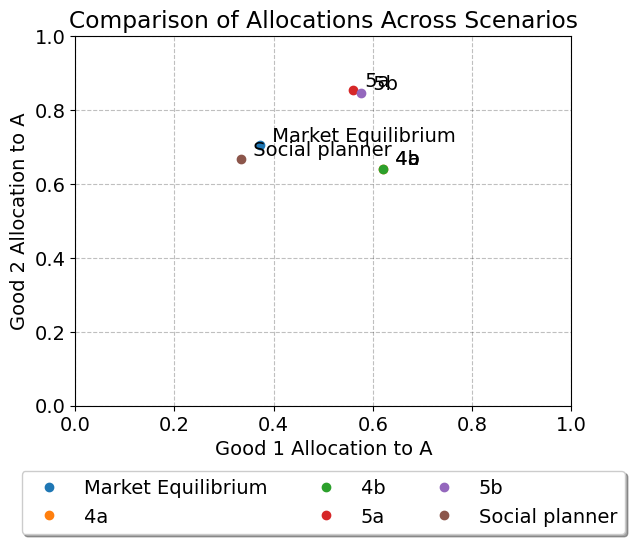

In [88]:

results = {
    "Market Equilibrium": optimal_allocation_A_MC,
    "4a": optimal_allocation_A_4a,
    "4b": optimal_allocation_A_4b,
    "5a": optimal_allocation_A_5a,
    "5b": optimal_allocation_A_5b,
    "Social planner": optimal_allocation_A_6a
}

fig, ax = plt.subplots()
for scenario, allocation in results.items():
    # Unpack the tuple directly
    x1A, x2A = allocation
    ax.plot(x1A, x2A, 'o', label=scenario)
    ax.text(x1A, x2A, f"  {scenario}", verticalalignment='bottom')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Good 1 Allocation to A")
ax.set_ylabel("Good 2 Allocation to A")
ax.set_title("Comparison of Allocations Across Scenarios")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, shadow=True)
plt.grid(True)
plt.show()

It is seen that the market equilibrium and the social planner equilibrium are fairly close. These also ensure the highest possible social utility. Equilibrium 4a and 4b are given in a case where consumer A has significant market power and can set a price that maximizes his/her own utility, disregarding the utility of consumer B. It is seen that these are approx. the same allocations. 5a shows the allocation from set C as also shown in question 1, and 5b shows the allocation when we don't restrict set C, which also are seen to be approx. the same.

The pros of the market and social equilibrium is as stated that there is most possible social utility. The cases 4a, 4b, 5a and 5b have the con of giving substantial market power to one consumer, A. The pro in 5a and 5b is that the allocation will be pareto optimal even though one of the consumers have all the market power.

# Question 7

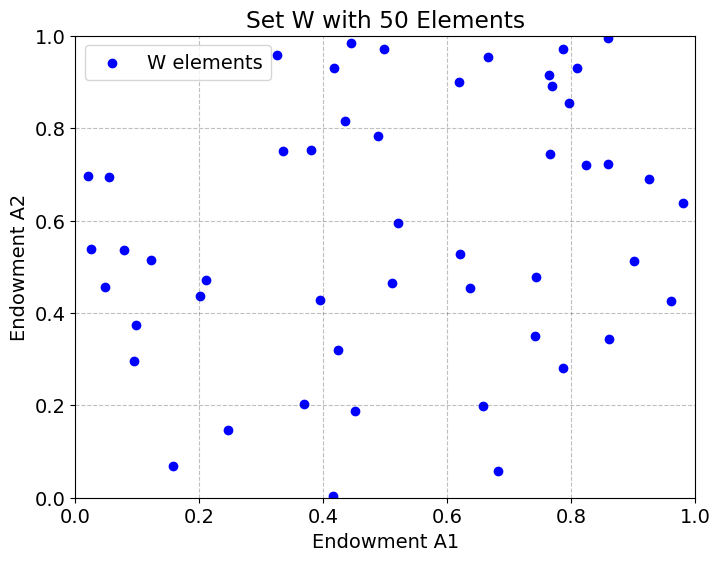

In [22]:
# set a random seed
np.random.seed(52)

# Generating 50 random (wA1, wA2) pairs where wA1, wA2 ~ U(0,1)
w1A_values = np.random.uniform(0, 1, 50)
w2A_values = np.random.uniform(0, 1, 50)

# Plotting the generated values
plt.figure(figsize=(8, 6))
plt.scatter(w1A_values, w2A_values, color='blue', label='W elements')
plt.title('Set W with 50 Elements')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Endowment A1')
plt.ylabel('Endowment A2')
plt.grid(True)
plt.legend()
plt.show()

# Question 8

[(0.27094372404799094, 0.5978355363948319), (0.5911211044430903, 0.8525692996688297), (0.32377806821605765, 0.656972455411421), (0.3655149204930637, 0.6973663090029707), (0.43798154375757187, 0.7571167223939635), (0.49875922101401104, 0.7992047173249298), (0.3021753161666665, 0.6339810195699582), (0.5505767447770353, 0.830516977404253), (0.4998555060896638, 0.7999075078599237), (0.21749587869309686, 0.5264690009037044), (0.3132488150117061, 0.6459582711204941), (0.0840789770449289, 0.26857210470141907), (0.04816247874257328, 0.16832855378935302), (0.19278313502503241, 0.4885689680755063), (0.278288554159167, 0.6066679645275216), (0.17927173262900856, 0.4663024084436943), (0.2736251693211194, 0.6010848476448961), (0.3599610928293122, 0.6922717184225886), (0.3760583784449914, 0.7068184797409562), (0.09944126181225256, 0.30636814307087623), (0.43120783080362013, 0.7520115349889039), (0.189871631392271, 0.4838680675028877), (0.42115570823729986, 0.7442665345376472), (0.39280480308329635, 0

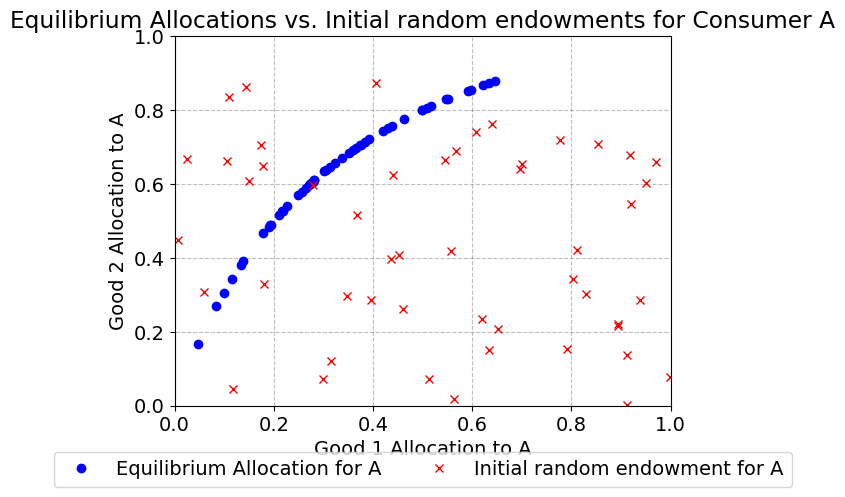

In [92]:

# Drawing random values
w1A_values = np.random.uniform(0, 1, 50)
w2A_values = np.random.uniform(0, 1, 50)

# Creating empty set for allocations
equilibrium_allocations_A = []

# Finding equilibrium allocations based on the random endowments
for w1A, w2A in zip(w1A_values, w2A_values):
    
    # Setting the new endowments 
    model.par.w1A = w1A
    model.par.w2A = w2A
    model.par.w1B = 1 - w1A
    model.par.w2B = 1 - w2A

    # Finding EQ price
    p1_eq = model.find_equilibrium_price()
    
    # finding EQ allocation
    x_A1_star, x_A2_star = model.demand_Arand(p1_eq,w1A,w2A)
    
    equilibrium_allocations_A.append((x_A1_star, x_A2_star))

print(equilibrium_allocations_A)

# Plotting the corresponding EQ allocations for each randomized endowment set
fig, ax = plt.subplots()

for allocation in equilibrium_allocations_A:
    ax.plot(allocation[0], allocation[1], 'o', color='blue', label='Equilibrium Allocation for A' if ax.get_legend_handles_labels()[1].count('Equilibrium Allocation for A') < 1 else "")

for w1A, w2A in zip(w1A_values, w2A_values):
    ax.plot(w1A, w2A, 'x', color='red', label='Initial random endowment for A' if ax.get_legend_handles_labels()[1].count('Initial Endowment for A') < 1 else "")

ax.set_xlabel('Good 1 Allocation to A')
ax.set_ylabel('Good 2 Allocation to A')
ax.set_title('Equilibrium Allocations vs. Initial random endowments for Consumer A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.show()